In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [34]:
data_colorchecker = pd.read_excel('ColorChecker_RGB_and_spectra.xls', sheet_name='spectral_data', index_col='Color name', skiprows=1, nrows=24)
data_colorchecker = data_colorchecker.drop(columns=['No.'])

In [35]:
data_colorchecker.head()

380       390       400       410       420       430  \
Color name                                                                
dark skin    0.054928  0.058196  0.060952  0.062206  0.062053  0.061716   
light skin   0.121190  0.148141  0.180052  0.196914  0.201313  0.203969   
blue sky     0.140803  0.184342  0.253856  0.306988  0.324564  0.331075   
foliage      0.050885  0.053654  0.055276  0.056408  0.057415  0.058832   
blue flower  0.158202  0.208656  0.300129  0.379623  0.412229  0.424513   

                  440       450       460       470  ...       640       650  \
Color name                                           ...                       
dark skin    0.061316  0.060896  0.060749  0.060863  ...  0.168002  0.178712   
light skin   0.208183  0.215898  0.229349  0.250034  ...  0.575687  0.593813   
blue sky     0.334410  0.333286  0.326504  0.314477  ...  0.141333  0.144916   
foliage      0.060468  0.061553  0.062486  0.063456  ...  0.106617  0.109036   
blue flower  0.429127  0.428518  0.421513  0.405380  ...  0.275969  0.310294   

                  660       670       680       690       700       710  \
Color name                                                                
dark skin    0.187641  0.190216  0.187565  0.184661  0.185506  0.191601   
light skin   0.611101  0.622816  0.634289  0.650544  0.672105  0.692825   
blue sky     0.149528  0.150637  0.147176  0.141332  0.134179  0.130998   
foliage      0.110973  0.111131  0.110686  0.112285  0.116848  0.123456   
blue flower  0.345441  0.364853  0.367350  0.363177  0.361778  0.367687   

                  720       730  
Color name                       
dark skin    0.200459  0.213745  
light skin   0.710127  0.727664  
blue sky     0.133358  0.143824  
foliage      0.129077  0.135007  
blue flower  0.377500  0.394460  

[5 rows x 36 columns]

In [64]:
data_colorchecker.loc['dark skin', :].shape
# rowData = dfObj.loc[ 'b' , : ]

(36,)

In [45]:
data_colormatch = pd.read_csv('ColorChecker2005-ColorMatch.csv', skiprows=1, index_col=0)

In [46]:
data_colormatch.head()

R'   G'   B'
Color name               
illuminant  255  255  255
dark skin   111   85   72
light skin  191  150  131
blue sky     93  122  151
foliage      96  103   72

In [102]:
colormatch_values = list()
colormatch_names = list()

for i, j in data_colormatch.iterrows():
    colormatch_values.append(j.values.tolist())
    colormatch_names.append(i)

# discarding illuminant
colormatch_values = colormatch_values[1:]
colormatch_names = colormatch_names[1:]

In [181]:
colormatch_values[0]

[111, 85, 72]

## Macbeth ColorChecker chart

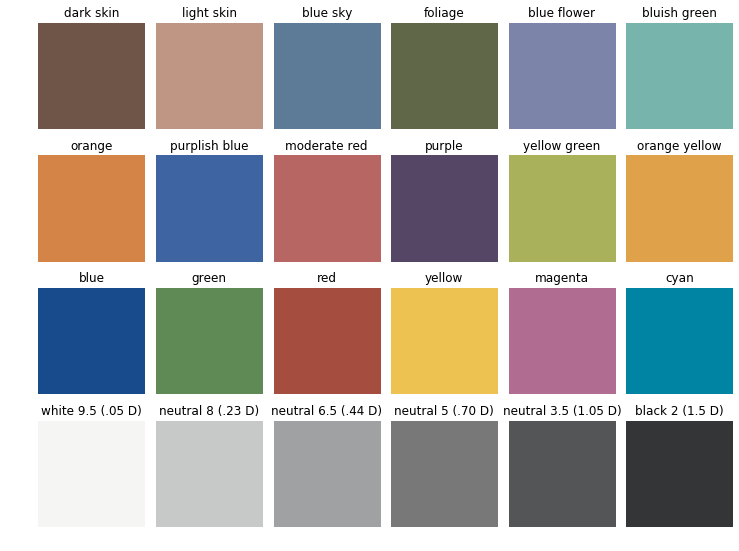

In [103]:
x, y = 4, 6 # size of color grid

fig, ax = plt.subplots(x, y, sharex='col', sharey='row', figsize=(14,14))

for i in range(x):
    for j in range(y):
        img_ij = np.full((2, 2, 3), colormatch_values[i * y + j])
        
        ax[i, j].axis('off')
        ax[i, j].set_title(colormatch_names[i * y + j])
        ax[i, j].imshow(img_ij)
        ax[i, j].set_aspect('equal')

fig.subplots_adjust(wspace=0.0, hspace=0.25, bottom=0.1, top=0.6, left=0.1, right=0.8)

In [82]:
data_spec = pd.read_excel('all_1nm_data.xls', header=0, skiprows=3)
data_spec = data_spec[80:-100:10] # [380, 730] nm range, steps=10
data_spec.head()

nm    CIE A  CIE D65   VM(l)     V'(l)     x bar     y bar    z bar  \
80   380   9.7951  49.9755  0.0002  0.000589  0.001368  0.000039  0.00645   
90   390  12.0853  54.6482  0.0008  0.002209  0.004243  0.000120  0.02005   
100  400  14.7080  82.7549  0.0028  0.009290  0.014310  0.000396  0.06785   
110  410  17.6753  91.4860  0.0074  0.034840  0.043510  0.001210  0.20740   
120  420  20.9950  93.4318  0.0175  0.096600  0.134380  0.004000  0.64560   

      x bar.1   y bar.1   z bar.1  
80   0.000160  0.000017  0.000705  
90   0.002362  0.000253  0.010482  
100  0.019110  0.002004  0.086011  
110  0.084736  0.008756  0.389366  
120  0.204492  0.021391  0.972542

In [83]:
wavelen = data_spec['nm'].values
illuminance = data_spec['CIE A'].values # L_w
vm = data_spec['VM(l)'].values # Betha
v_ = data_spec['V\'(l)'].values
# cie 2. colour-matching
xbar = data_spec['x bar'].values 
ybar = data_spec['y bar'].values
zbar = data_spec['z bar'].values

In [168]:
def spectrum2xyz(xbar, ybar, zbar, color):
    
    X = np.sum(xbar * color)
    Y = np.sum(ybar * color)
    Z = np.sum(zbar * color)
    
    XYZ = (X + Y + Z)
    
    x = X / XYZ
    y = Y / XYZ
    z = Z / XYZ
    
    return x, y, z

### Magenta

In [301]:
x, y, z = spectrum2xyz(xbar, ybar, zbar, data_colorchecker.loc['magenta', :].values)
rgb = xyz2srgb(x, y, z)
rgb = np.clip(rgb, 0.0, 1.0) # clip values [0-1]
rgb *= 255
rgb = np.array(rgb, dtype='uint8')

print(rgb)

[[185  24  88]]


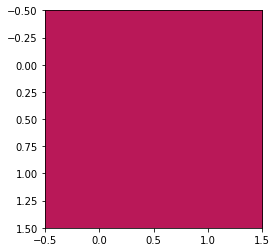

In [302]:
# np.full((2, 2, 3), colormatch_values[0])
plt.imshow(np.full((2, 2, 3), rgb))
plt.show()

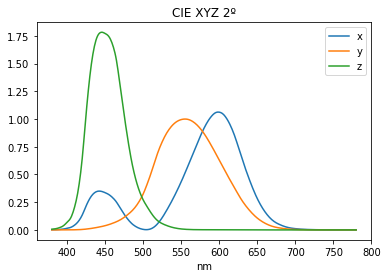

In [105]:
plt.plot(wavelen, xbar, label='x')
plt.plot(wavelen, ybar, label='y')
plt.plot(wavelen, zbar, label='z')
plt.title('CIE XYZ 2º')
plt.legend()
plt.xlabel('nm')
plt.show()

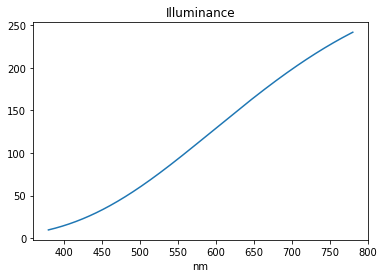

In [106]:
plt.plot(wavelen, illuminance)
plt.title('Illuminance')
plt.xlabel('nm')
plt.show()

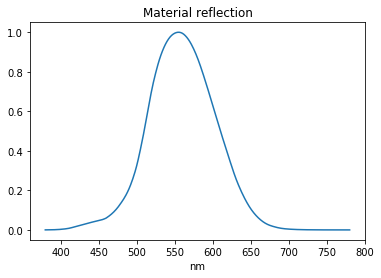

In [10]:
plt.plot(wavelen, vm)
plt.title('Material reflection')
plt.xlabel('nm')
plt.show()

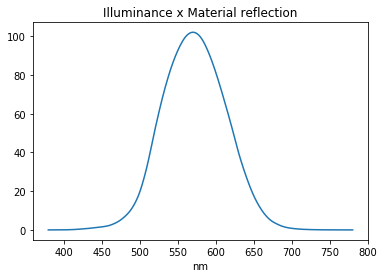

In [11]:
plt.plot(wavelen, (vm * illuminance))
plt.title('Illuminance x Material reflection')
plt.xlabel('nm')
plt.show()

## Computing XYZ from spectral data

In [107]:
d_lambda = 1.0
k = 1.0 / (d_lambda * np.sum(illuminance * ybar))
X = k * d_lambda * np.sum(illuminance * vm * xbar)
Y = k * d_lambda * np.sum(illuminance * vm * ybar)
Z = k * d_lambda * np.sum(illuminance * vm * zbar)

In [108]:
print(X, Y, Z)

0.6049214799228358 0.7134110574496908 0.04287454144186048


In [109]:
x = X / (X + Y + Z)
y = Y / (X + Y + Z)
z = Z / (X + Y + Z)

In [110]:
1 - (x + y)

0.03149744231362983

In [111]:
y_w = k * d_lambda * np.sum(illuminance * ybar)

In [112]:
y_w

1.0

### Colour system

In [22]:
# ITU-R BR.709 (IlluminantD65)
x_w, y_w = 0.3127, 0.3290
x_r, x_g, x_b = 0.64, 0.30, 0.15
y_r, y_g, y_b = 0.33, 0.6, 0.06

### CIE xyz to sRGB

In [211]:
def xyz2srgb(X, Y, Z):
    XYZ_T = np.matrix([X, Y, Z]).T
    
    #sRGB D65
    sRGB = np.matrix([
        [3.2404542, -1.5371385, -0.4985314,],
        [-0.9692660, 1.8760108, 0.0415560,],
        [0.0556434, -0.2040259, 1.0572252],
    ])
    
    return sRGB.dot(XYZ_T).flatten()

In [212]:
xyz2srgb(1, 1, 1)

matrix([[1.2047843, 0.9483008, 0.9088427]])